# Task 1 :  Working with Series

In [13]:
import pandas as pd

data = pd.Series([25, 30, 35, 40, 45], index=['A', 'B', 'C', 'D', 'E'])

print("First 3 elements:\n", data.head(3))
print("Mean:", data.mean())
print("Median:", data.median())
print("Standard Deviation:", data.std())


First 3 elements:
 A    25
B    30
C    35
dtype: int64
Mean: 35.0
Median: 35.0
Standard Deviation: 7.905694150420948


# Task 2 : Creating and Inspecting DataFrames

In [14]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
    'Age': [20, 22, 19, 21, 20],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Marks': [85, 78, 92, 74, 88]
})

print("First 2 rows:\n", df.head(2))
print("Columns:", df.columns)
print("Data types:\n", df.dtypes)
print("Summary stats:\n", df.describe())

df['Passed'] = df['Marks'] >= 80


First 2 rows:
     Name  Age  Gender  Marks
0  Alice   20  Female     85
1    Bob   22    Male     78
Columns: Index(['Name', 'Age', 'Gender', 'Marks'], dtype='object')
Data types:
 Name      object
Age        int64
Gender    object
Marks      int64
dtype: object
Summary stats:
              Age      Marks
count   5.000000   5.000000
mean   20.400000  83.400000
std     1.140175   7.334848
min    19.000000  74.000000
25%    20.000000  78.000000
50%    20.000000  85.000000
75%    21.000000  88.000000
max    22.000000  92.000000


# Task 3 : Data Selection and Filtering 

In [16]:
print("Name and Marks:\n", df[['Name', 'Marks']])

print("Students with Marks > 80:\n", df[df['Marks'] > 80])

print("Student with highest Marks:\n", df[df['Marks'] == df['Marks'].max()])


Name and Marks:
     Name  Marks
0  Alice     85
1    Bob     78
2  Carol     92
3  David     74
4    Eve     88
Students with Marks > 80:
     Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
2  Carol   19  Female     92    True
4    Eve   20  Female     88    True
Student with highest Marks:
     Name  Age  Gender  Marks  Passed
2  Carol   19  Female     92    True


# Task 4 : Handling Missing Data 

In [17]:
df.loc[1, 'Marks'] = None
df.loc[4, 'Age'] = None

print("Missing values:\n", df.isnull())

df['Marks'].fillna(df['Marks'].mean(), inplace=True)
df.dropna(subset=['Age'], inplace=True)


Missing values:
     Name    Age  Gender  Marks  Passed
0  False  False   False  False   False
1  False  False   False   True   False
2  False  False   False  False   False
3  False  False   False  False   False
4  False   True   False  False   False


C:\Users\DELL\AppData\Local\Temp\ipykernel_16712\3636479413.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].fillna(df['Marks'].mean(), inplace=True)


# Task 5 : Grouping and Aggregation 

In [18]:
print("Group by Gender (mean age and marks):\n", df.groupby('Gender')[['Age', 'Marks']].mean())

print("Student count by Gender:\n", df['Gender'].value_counts())


Group by Gender (mean age and marks):
          Age   Marks
Gender              
Female  19.5  88.500
Male    21.5  79.375
Student count by Gender:
 Gender
Female    2
Male      2
Name: count, dtype: int64


# Task 6 : Reading and Writing Data 

In [20]:
df.to_csv('students_data.csv', index=False)

new_df = pd.read_csv('students_data.csv')
print("First 5 rows of loaded data:\n", new_df.head())


First 5 rows of loaded data:
     Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False


# Task 7 :  General 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
Missing values:
 total_bill    0
tip           0
sex           0
smoker 

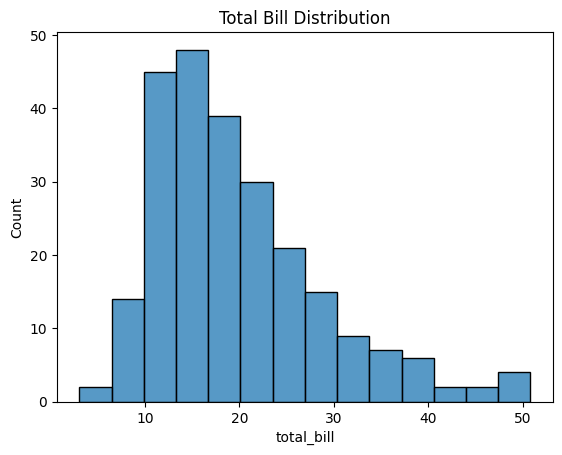

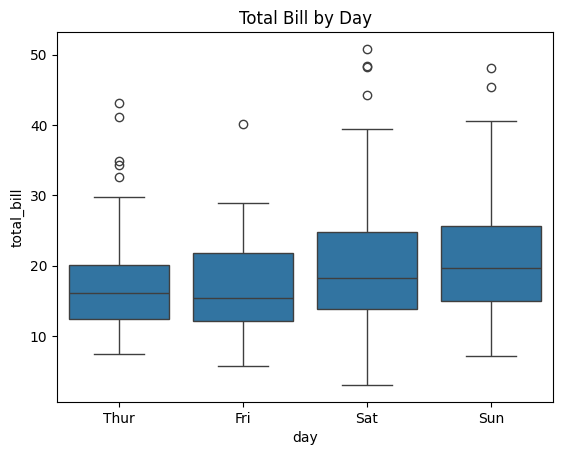

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

print(tips.info())
print(tips.describe())
print("Missing values:\n", tips.isnull().sum())

sns.histplot(tips['total_bill'])
plt.title("Total Bill Distribution")
plt.show()

sns.boxplot(x='day', y='total_bill', data=tips)
plt.title("Total Bill by Day")
plt.show()
